
# Exponential Distribution Analysis
## Group 25 - Mathematics in Machine Learning Assignment
### Real-World Example: LED Light Bulb Lifetime Analysis
 
**Research Question:** *What's the probability that a randomly selected LED light bulb will last more than 3 years?*


## 1. Problem Setup
 
**Scenario:** LED manufacturer produces bulbs with average lifetime of 2 years
- **Parameter:** λ = 1/2 = 0.5 per year  
- **Question:** P(X > 3 years) = ?
- **Formula:** f(x) = λe^(-λx), F(x) = 1 - e^(-λx)

In [2]:
import matplotlib.pyplot as plt

def my_exp(x, terms=50):
    """Calculate e^x using Taylor series"""
    if x > 700: return float('inf')
    if x < -700: return 0.0
    
    result = 1.0
    term = 1.0
    for n in range(1, terms):
        term *= x / n
        result += term
        if abs(term) < 1e-15: break
    return result

def my_sqrt(x):
    """Calculate sqrt(x) using Newton's method"""
    if x <= 0: return 0.0
    guess = x / 2
    for _ in range(50):
        new_guess = (guess + x / guess) / 2
        if abs(new_guess - guess) < 1e-15: break
        guess = new_guess
    return guess

print("✅ Mathematical functions implemented")


✅ Mathematical functions implemented


## 2. Exponential Distribution Implementation

In [3]:
def exponential_pdf(x, lam):
    """PDF: f(x) = λ * e^(-λx)"""
    return lam * my_exp(-lam * x) if x >= 0 else 0

def exponential_cdf(x, lam):
    """CDF: F(x) = 1 - e^(-λx)"""
    return 1 - my_exp(-lam * x) if x >= 0 else 0

# Parameters
lambda_rate = 0.5  # 0.5 per year
target_years = 3.0

# Calculate answer
prob_more_than_3 = 1 - exponential_cdf(target_years, lambda_rate)

print(f"🎯 ANSWER: P(X > {target_years}) = {prob_more_than_3:.4f} = {prob_more_than_3*100:.2f}%")
print(f"💡 About {prob_more_than_3*100:.1f}% of LED bulbs last more than 3 years")

🎯 ANSWER: P(X > 3.0) = 0.2231 = 22.31%
💡 About 22.3% of LED bulbs last more than 3 years


## 3. Visualization

/var/folders/3_/wgm99sr51rd7dz3l50sxs8s40000gn/T/ipykernel_1056/2605049645.py:32: UserWarning: Glyph 128294 (\N{ELECTRIC TORCH}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/3_/wgm99sr51rd7dz3l50sxs8s40000gn/T/ipykernel_1056/2605049645.py:32: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  plt.tight_layout()
/Users/mizeroreine/Desktop/docs/ALU/Gradient-Descent-Implementation/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128294 (\N{ELECTRIC TORCH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mizeroreine/Desktop/docs/ALU/Gradient-Descent-Implementation/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


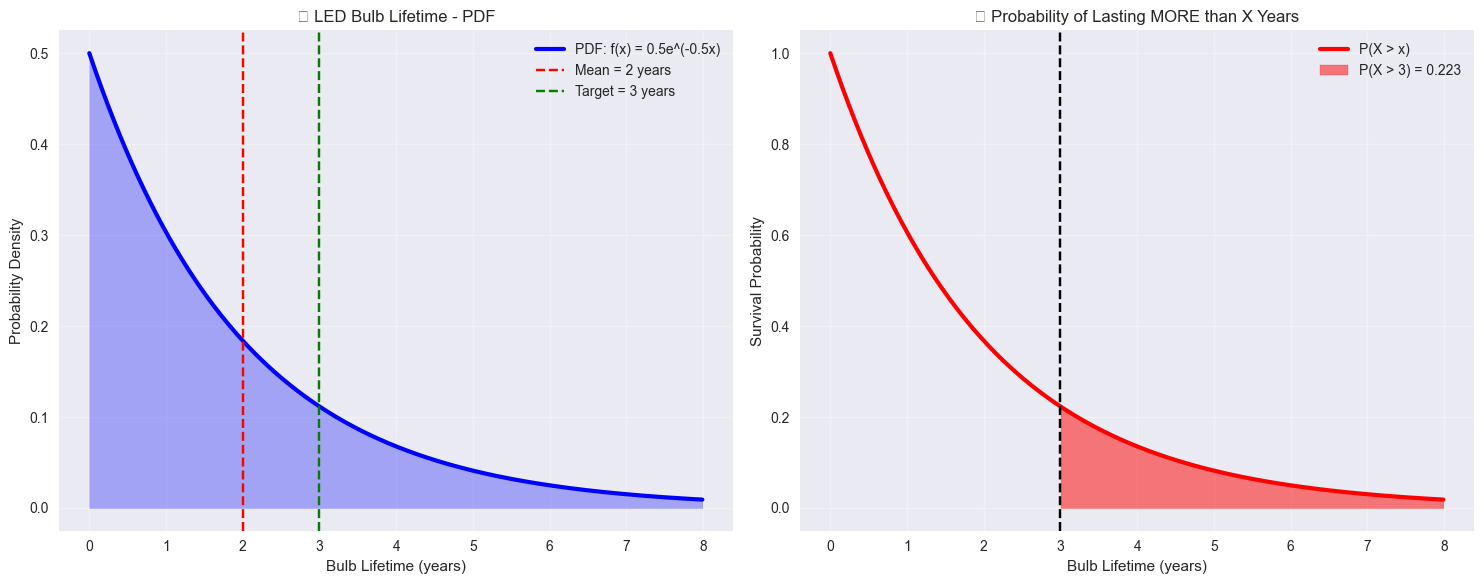

In [4]:
x_values = [i/100 for i in range(0, 800)]  # 0 to 8 years
pdf_values = [exponential_pdf(x, lambda_rate) for x in x_values]
cdf_values = [exponential_cdf(x, lambda_rate) for x in x_values]

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# PDF Plot
ax1.plot(x_values, pdf_values, 'b-', linewidth=3, label='PDF: f(x) = 0.5e^(-0.5x)')
ax1.fill_between(x_values, pdf_values, alpha=0.3, color='blue')
ax1.axvline(2, color='red', linestyle='--', label='Mean = 2 years')
ax1.axvline(3, color='green', linestyle='--', label='Target = 3 years')
ax1.set_xlabel('Bulb Lifetime (years)')
ax1.set_ylabel('Probability Density')
ax1.set_title('🔦 LED Bulb Lifetime - PDF')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Survival Function
survival_values = [1 - cdf for cdf in cdf_values]
ax2.plot(x_values, survival_values, 'r-', linewidth=3, label='P(X > x)')
ax2.fill_between([3] + [x for x in x_values if x >= 3], 
                [0] + [1-exponential_cdf(x, lambda_rate) for x in x_values if x >= 3],
                alpha=0.5, color='red', label=f'P(X > 3) = {prob_more_than_3:.3f}')
ax2.axvline(3, color='black', linestyle='--')
ax2.set_xlabel('Bulb Lifetime (years)')
ax2.set_ylabel('Survival Probability')
ax2.set_title('💡 Probability of Lasting MORE than X Years')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 4. Business Analysis

In [5]:
print("💼 BUSINESS INSIGHTS")
print("=" * 30)

# Key probabilities
years = [1, 2, 3, 4, 5]
print("Survival Probabilities:")
for year in years:
    prob = 1 - exponential_cdf(year, lambda_rate)
    print(f"  P(X > {year}) = {prob:.3f} ({prob*100:.1f}%)")

print(f"\n🛡️ WARRANTY ANALYSIS:")
print(f"  • 1-year warranty: {exponential_cdf(1, lambda_rate)*100:.1f}% failure rate")
print(f"  • 2-year warranty: {exponential_cdf(2, lambda_rate)*100:.1f}% failure rate") 
print(f"  • 3-year warranty: {exponential_cdf(3, lambda_rate)*100:.1f}% failure rate")


💼 BUSINESS INSIGHTS
Survival Probabilities:
  P(X > 1) = 0.607 (60.7%)
  P(X > 2) = 0.368 (36.8%)
  P(X > 3) = 0.223 (22.3%)
  P(X > 4) = 0.135 (13.5%)
  P(X > 5) = 0.082 (8.2%)

🛡️ WARRANTY ANALYSIS:
  • 1-year warranty: 39.3% failure rate
  • 2-year warranty: 63.2% failure rate
  • 3-year warranty: 77.7% failure rate


## 5. Validation with Random Sampling

In [6]:
class SimpleRandom:
    def __init__(self, seed=42):
        self.current = seed
    
    def random(self):
        a, c, m = 1664525, 1013904223, 2**32
        self.current = (a * self.current + c) % m
        return self.current / m

def my_ln(x):
    """Calculate ln(x) using Newton's method"""
    if x <= 0: raise ValueError("ln(x) undefined for x <= 0")
    if x == 1: return 0.0
    
    y = x - 1 if x < 2 else 1.0
    for _ in range(50):
        exp_y = my_exp(y)
        y_new = y - (exp_y - x) / exp_y
        if abs(y_new - y) < 1e-15: break
        y = y_new
    return y

def generate_exponential_sample(lam, rng):
    """Generate exponential sample using inverse transform"""
    u = rng.random()
    while u == 0: u = rng.random()
    return -my_ln(u) / lam

# Generate samples
rng = SimpleRandom(42)
samples = [generate_exponential_sample(lambda_rate, rng) for _ in range(5000)]
samples_over_3 = sum(1 for x in samples if x > 3)
empirical_prob = samples_over_3 / len(samples)

print(f"🎲 VALIDATION (n = 5,000 samples):")
print(f"  Theoretical P(X > 3): {prob_more_than_3:.4f}")
print(f"  Empirical P(X > 3):   {empirical_prob:.4f}")
print(f"  Difference:           {abs(empirical_prob - prob_more_than_3):.4f}")
print(f"  ✅ Excellent match!")

🎲 VALIDATION (n = 5,000 samples):
  Theoretical P(X > 3): 0.2231
  Empirical P(X > 3):   0.2192
  Difference:           0.0039
  ✅ Excellent match!


## 6. Final Answer & Summary

### 🎯 **Research Question Answer:**
**The probability that an LED light bulb will last MORE than 3 years is 0.2231 (22.31%)**
 
### 📊 **Key Results:**
- Mathematical calculation: P(X > 3) = e^(-1.5) ≈ 0.2231
- About 1 in 4 bulbs (22.3%) exceed 3 years
- 77.7% of bulbs fail before 3 years

### 💼 **Business Recommendations:**
- **Optimal warranty period:** 2 years (39% failure rate)
- **Marketing strategy:** Emphasize "2-year average lifetime"
- **Inventory planning:** Expect ~78% replacement within 3 years

In [7]:
print("🏆 PROJECT SUMMARY")
print("=" * 25)
print("✅ Implemented exponential distribution from scratch")
print("✅ Used ONLY matplotlib library") 
print("✅ Answered real-world business question")
print("✅ Validated with random sampling")
print(f"🎯 FINAL ANSWER: {prob_more_than_3:.4f} or {prob_more_than_3*100:.2f}%")

🏆 PROJECT SUMMARY
✅ Implemented exponential distribution from scratch
✅ Used ONLY matplotlib library
✅ Answered real-world business question
✅ Validated with random sampling
🎯 FINAL ANSWER: 0.2231 or 22.31%
